**Project Objective:**
To perform text analysis on a given text using Natural Language Processing (NLP) techniques including tokenization, stop word removal, stemming, and lemmatization. The analysis is visualized through a word cloud to highlight the most frequent and important words in the text, providing insights into the text's content and key themes.

In [1]:
# Import necessary libraries
import nltk
import wordcloud
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

In [2]:
# Downloading NLTK resources
nltk.download('punkt') # For tokenization
nltk.download('punkt_tab') # For tokenization
nltk.download('words') # For word list
nltk.download('stopwords') # For stop word removal
nltk.download('wordnet') # For lemmatization

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
text="""Data analytics, data science, machine learning, and natural language processing (NLP) are related fields that use a variety of techniques to analyze data and extract insights:
Data analytics
Involves processing and analyzing existing data sets to identify trends and inform business decisions. Data analysts use tools like Excel, SQL, and data visualization tools to prepare reports."""

In [4]:
text = re.sub(r"[^a-zA-Z0-9 ]+", "", text)  # Remove non-alphanumeric characters
text = " ".join(text.split())  # Remove extra whitespace
text = text.lower() # Convert to lowercase
text

'data analytics data science machine learning and natural language processing nlp are related fields that use a variety of techniques to analyze data and extract insightsdata analyticsinvolves processing and analyzing existing data sets to identify trends and inform business decisions data analysts use tools like excel sql and data visualization tools to prepare reports'

In [5]:
# Tokenization: Break down the text into individual words
tokenized_word = word_tokenize(text)
# Define punctuation
punctuation = string.punctuation
# Remove punctuation
tokenized_word = [word for word in tokenized_word if word not in punctuation]
tokenized_word

['data',
 'analytics',
 'data',
 'science',
 'machine',
 'learning',
 'and',
 'natural',
 'language',
 'processing',
 'nlp',
 'are',
 'related',
 'fields',
 'that',
 'use',
 'a',
 'variety',
 'of',
 'techniques',
 'to',
 'analyze',
 'data',
 'and',
 'extract',
 'insightsdata',
 'analyticsinvolves',
 'processing',
 'and',
 'analyzing',
 'existing',
 'data',
 'sets',
 'to',
 'identify',
 'trends',
 'and',
 'inform',
 'business',
 'decisions',
 'data',
 'analysts',
 'use',
 'tools',
 'like',
 'excel',
 'sql',
 'and',
 'data',
 'visualization',
 'tools',
 'to',
 'prepare',
 'reports']

In [6]:
# Stop word removal
stop_words = set(stopwords.words('english'))  # Using a set for efficient lookup
text_without_stopwords = [word for word in tokenized_word if not word in stop_words]
text_without_stopwords

['data',
 'analytics',
 'data',
 'science',
 'machine',
 'learning',
 'natural',
 'language',
 'processing',
 'nlp',
 'related',
 'fields',
 'use',
 'variety',
 'techniques',
 'analyze',
 'data',
 'extract',
 'insightsdata',
 'analyticsinvolves',
 'processing',
 'analyzing',
 'existing',
 'data',
 'sets',
 'identify',
 'trends',
 'inform',
 'business',
 'decisions',
 'data',
 'analysts',
 'use',
 'tools',
 'like',
 'excel',
 'sql',
 'data',
 'visualization',
 'tools',
 'prepare',
 'reports']

In [7]:
# Stemming
stemmer = SnowballStemmer("english")
stemmed_words = [stemmer.stem(word) for word in text_without_stopwords]
stemmed_words

['data',
 'analyt',
 'data',
 'scienc',
 'machin',
 'learn',
 'natur',
 'languag',
 'process',
 'nlp',
 'relat',
 'field',
 'use',
 'varieti',
 'techniqu',
 'analyz',
 'data',
 'extract',
 'insightsdata',
 'analyticsinvolv',
 'process',
 'analyz',
 'exist',
 'data',
 'set',
 'identifi',
 'trend',
 'inform',
 'busi',
 'decis',
 'data',
 'analyst',
 'use',
 'tool',
 'like',
 'excel',
 'sql',
 'data',
 'visual',
 'tool',
 'prepar',
 'report']

In [8]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in stemmed_words]
lemmatized_words

['data',
 'analyt',
 'data',
 'scienc',
 'machin',
 'learn',
 'natur',
 'languag',
 'process',
 'nlp',
 'relat',
 'field',
 'use',
 'varieti',
 'techniqu',
 'analyz',
 'data',
 'extract',
 'insightsdata',
 'analyticsinvolv',
 'process',
 'analyz',
 'exist',
 'data',
 'set',
 'identifi',
 'trend',
 'inform',
 'busi',
 'decis',
 'data',
 'analyst',
 'use',
 'tool',
 'like',
 'excel',
 'sql',
 'data',
 'visual',
 'tool',
 'prepar',
 'report']

In [9]:
# Joining the words back into a string
processed_text = " ".join(lemmatized_words)
processed_text

'data analyt data scienc machin learn natur languag process nlp relat field use varieti techniqu analyz data extract insightsdata analyticsinvolv process analyz exist data set identifi trend inform busi decis data analyst use tool like excel sql data visual tool prepar report'

In [10]:
# Creating the WordCloud object
wordcloud = wordcloud.WordCloud(width=800, height=400, background_color='black').generate(processed_text)
wordcloud

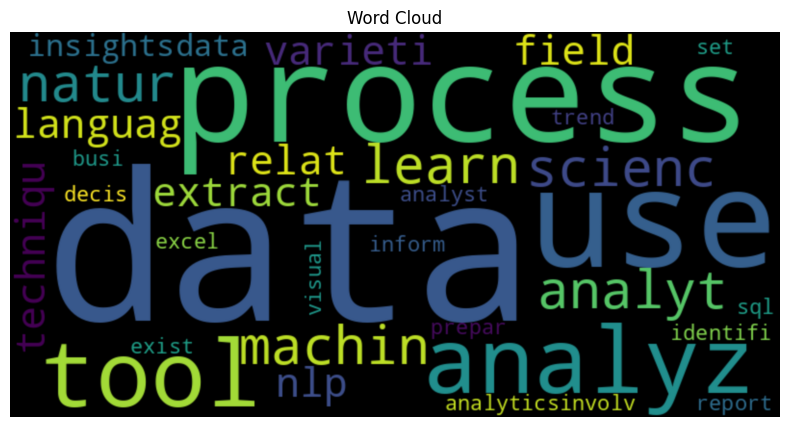

In [11]:
# Displaying the word cloud
import matplotlib.pyplot as plt # Importing for plotting
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bicubic')
plt.axis("off")
plt.title("Word Cloud")
plt.show()

The interpolation parameter in plt.imshow() controls how the image is displayed when it's resized or displayed at a different resolution. Here are some alternatives to 'bilinear' that you can try:

**nearest:** This is a simple and fast method that displays each pixel as a single color without smoothing. It's often preferred for word clouds to keep the words distinct and avoid blurring.

**bilinear:** This method computes the new pixel value as a weighted average of the nearest four pixels. It offers a reasonable balance between speed and quality, providing some smoothing without excessive blurring.

**bicubic:** This method uses a cubic spline to interpolate pixel values, resulting in a smoother image compared to 'bilinear'. It might make the word cloud look more visually appealing, but it can also blur the edges of the words slightly.

**antialiased:** This option applies anti-aliasing to the image, reducing jagged edges and making the text appear smoother. It's a good choice for a more polished look, especially if your word cloud contains small or intricate fonts.

**None:** When set to None, Matplotlib will use the default interpolation method specified in your Matplotlib configuration. This might be 'antialiased' in most cases.